<a href="https://colab.research.google.com/github/OlegKuzmin1968/Oleg_Kuzmin/blob/main/%D0%A7%D1%82%D0%B5%D0%BD%D0%B8%D0%B5_DF_nsk_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Классификации методик лечения третьей стадии рака легких (НМИЦ профилактической медицины)**



# Техническое Задание

**Техническое Задание (ТЗ) на разработку нейронной сети для классификации методик лечения рака легких на основе обследований:**

1. Введение:

   Задача заключается в разработке нейронной сети для классификации методик лечения третьей стадии рака легких на основе результатов обследований. Сеть должна предсказывать как метод лечения, так и уверенность доктора в диагнозе и выбранной методике лечения.

2. Требования к модели:

   - Разработать многоклассовую нейронную сеть для классификации методик лечения на основе параметров обследования.
   - Сеть должна иметь возможность предсказывать не только класс методики лечения, но и уровень уверенности доктора в диагнозе и выбранной методике лечения.
   - Модель должна принимать на вход результаты обследования и возвращать вероятности принадлежности к каждому классу методики лечения и уверенность доктора.

3. Данные:

   - Имеется таблица с 2480(248 833) обследованиями третьей стадии рака легких.
   - Для каждого обследования представлены параметры, такие как биомаркеры, клинические данные и результаты тестов.

4. Архитектура сети:

   - Разработать архитектуру нейронной сети, включая входной слой, скрытые слои и выходной слой.
   - Использовать функции активации, например, ReLU для скрытых слоев и Softmax для выходного слоя.

5. Функциональность модели:

   Модель должна принимать на вход параметры обследования и возвращать:
    - Вектор вероятностей принадлежности к каждому классу методики лечения.
    - Значение уверенности доктора в диагнозе и выбранной методике лечения.

6. Обучение и оценка:

   - Разделить данные на обучающую, валидационную и тестовую выборки.
   - Выбрать функцию потерь для классификации и уверенности, например, категориальную перекрестную энтропию (Categorical Cross-Entropy) и среднеквадратичную ошибку (MSE) соответственно.
   - Выбрать оптимизатор для обучения, например, Adam.
   - Обучить модель на обучающей выборке и настроить гипер параметры с использованием валидационной выборки.
   - Оценить производительность модели на тестовой выборке с помощью метрик классификации и рассчитать уровень уверенности.

7. Интерфейс и использование:

   - Разработать интерфейс для ввода результатов обследования.
   - Реализовать функции, которые будут принимать введенные данные, подавать их на вход модели и возвращать предсказанный класс методики лечения и уровень уверенности.

8. Требования к реализации:

   - Использовать подходящий фреймворк для глубокого обучения, например, TensorFlow или PyTorch.
   - Предоставить исходный код модели, обучающий код, скрипты для оценки и тестирования.

9. Дополнительные требования:

   - Обеспечить возможность обновления модели с учетом новых данных и методов лечения.
   - Обеспечить документацию по использованию модели и интерфейса.

10. Заключение:

   - Разработка нейронной сети для классификации методик лечения третьей стадии рака легких должна удовлетворять указанным требованиям и обеспечивать точные и надежные результаты классификации и уверенности доктора.

# Импорт библиотек

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузка файлов из облака
import gdown                       # Библиотека для работы с массивами данных
import numpy as np                 # Библиотека для обработки и анализа данных
import pandas as pd                # Библиотека для построения графиков
import matplotlib.pyplot as plt    # Команда для отображения графики в ячейках среды Google Colaboratory
%matplotlib inline
# Библиотека для построения графиков
import seaborn as sns
import math
import re
import os.path

from IPython.display import clear_output   # Для работы с датами
from datetime import datetime

#Используем для to_categoricall
from tensorflow.keras import utils

# Загрузка датасета №1

In [ ]:
# Укажим путь к файлу с данными на моем диске
url = '/content/drive/MyDrive/Stag_2/отправка_комбинации поддержка после ПХТ 3 стадия.xlsx'

# Чтение данных из файла excel в pandas.DataFrame
df1 = pd.read_excel(url)
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


## Данные о пациенте и список проведенных исследований

In [ ]:
# Список входных параметров пациента и проведенных исследований
parametr = ['Раса','Пол','Возраст','Статус курения','Стадия','ECOG','Есть опухолевая нагрузка? (симптомная опухоль)','Вариант лекарственного лечения','Какая планируется линия, если лечебная положительно','Ко-мутации KRAS','Ко-мутации p53','Ко-мутации STK11','Ко-мутации KEAP1','Признаки прогрессирования после ХЛТ','Пульмонит боллее II степени после ХЛТ','Срок от окончания ХЛТ','МТС в головной мозг','Противопоказания к ЛТ','Гистология','Молекулярный статус (только для неплоскоклеточного рака)','PD-L1 статус','Предпочтение пациента по ответу на терапию']

# Представим список параметров в виде pd.df
df_parametr = pd.Series(parametr)

print('Размерность DF:', df_parametr.shape)
print(df_parametr)

Размерность DF: (22,)
0                                                  Раса
1                                                   Пол
2                                               Возраст
3                                        Статус курения
4                                                Стадия
5                                                  ECOG
6        Есть опухолевая нагрузка? (симптомная опухоль)
7                        Вариант лекарственного лечения
8     Какая планируется линия, если лечебная положит...
9                                       Ко-мутации KRAS
10                                       Ко-мутации p53
11                                     Ко-мутации STK11
12                                     Ко-мутации KEAP1
13                  Признаки прогрессирования после ХЛТ
14                Пульмонит боллее II степени после ХЛТ
15                                Срок от окончания ХЛТ
16                                  МТС в головной мозг
17                        

In [ ]:
# Список обязательных параметров, используемых при определении дальнейшего способа лечения. (источник: файл "Калькулятор принятия решения" / лист "параметры")
# Алгоритм по неоперабельной III стадии НМРЛ ПОСЛЕ 1 линия лечения ХЛТ пациента и проведенных исследований

series_H = np.array([13,14,15,18,19,20,21])
parametr_3stadia_H = df_parametr[series_H]
parametr_3stadia_H


13                  Признаки прогрессирования после ХЛТ
14                Пульмонит боллее II степени после ХЛТ
15                                Срок от окончания ХЛТ
18                                           Гистология
19    Молекулярный статус (только для неплоскоклеточ...
20                                         PD-L1 статус
21           Предпочтение пациента по ответу на терапию
dtype: object

Возможные варианты ответов по каждому параметру списка parametr_3stadia_H (исследуемого алгоритма)

In [ ]:
answer_options = {13:['не исследовались', 'да(if)', 'нет'], 14:['не исследовались', 'да', 'нет'], 15: ['нет данных','до 42 дней', 'от 43 до 60 дней', 'более 61 дня'], 18: [ 'не исследовались','Плоскоклеточный','Неплоскоклеточный',
'Мелкоклеточный (МРЛ)','Немелкоклеточный рак легкого (НМРЛ)'], 19: MS, 20: ['не исследовался', '<1%','1–49%','50-89%','90-100%'], 21:['не исследовались', 'результативность лечения', 'сохранение качества жизни'], }

print('Вывод по ключу', answer_options [13])
print('Возможные варианты ответов по Алгоритму-H')
answer_options

Вывод по ключу ['не исследовались', 'да(if)', 'нет']
Возможные варианты ответов по Алгоритму-H


{13: ['не исследовались', 'да(if)', 'нет'],
 14: ['не исследовались', 'да', 'нет'],
 15: ['не исследовались', 'до 42 дней', 'от 43 до 60 дней', 'более 61 дня'],
 18: ['не исследовались',
  'Плоскоклеточный',
  'Неплоскоклеточный',
  'Мелкоклеточный (МРЛ)',
  'Немелкоклеточный рак легкого (НМРЛ)'],
 19: ['не исследовались',
  'нет мутаций',
  'EGFR ex19',
  'EGFR ex21',
  'EGFR ex18',
  'EGFR ex20',
  'EGFR T790M',
  'EGFR (G719X,L816Q, S768I)',
  'ALK',
  'ROS1',
  'BRAF',
  'RET',
  'MET 14ex',
  'HER2',
  'KRAS G12C',
  'NTRK'],
 20: ['не исследовался', '<1%', '1–49%', '50-89%', '90-100%'],
 21: ['не исследовались',
  'результативность лечения',
  'сохранение качества жизни']}

In [ ]:
par = 20                     # задаем порядковый номер параметра (он же ключ к словарю возможных ответов)
le = answer_options [par]    # вытаскиваем список возможных ответов

print('Параметр-',par,', Варианты возможных ответов:', le)
print('Кол-во классов при переводе в one-hot-encoding -',len(le))
l =[]                        # пустой лист для записи порядковых номеров возможных ответов
for i in range (len(le)):    # запускаем цикл по длинне списка возможных ответов, который задает кол-во классов при переводе в one-hot-encoding
  l.append (i)               # возможным ответам присваиваем порядковый номер

i_arr2 = utils.to_categorical(l, len(le))  # порядковый номер ответа переводим в формат one-hot-encoding

print('Варианты ответов для параметра-',par, 'в формат one-hot-encoding','(', len(le),'-классов)', '\n', i_arr2)

Параметр- 20 , Варианты возможных ответов: ['не исследовался', '<1%', '1–49%', '50-89%', '90-100%']
Кол-во классов при переводе в one-hot-encoding - 5
Варианты ответов для параметра- 20 в формат one-hot-encoding ( 5 -классов) 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
print('Вывод по ключу', answer_options [15])
answer_options.keys()


Вывод по ключу ['не исследовались', 'до 42 дней', 'от 43 до 60 дней', 'более 61 дня']


dict_keys([13, 14, 15, 18, 19, 20, 21])

## Информация по колонкам

In [ ]:
print(f'размеры датафрейма dfexcel1: {df1.shape}')
print(f'  число строк: {df1.shape[0]}')
print(f'  число колонок: {df1.shape[1]}')
print('='*50)
nan_cell_count = df1.isna().sum().sum()
nan_cell_count_proc = nan_cell_count*100/df1.size
print(f'общее количество пропусков во всей таблице (колонка цех): {nan_cell_count}, {round(nan_cell_count_proc, 2)}%')

размеры датафрейма dfexcel1: (248832, 21)
  число строк: 248832
  число колонок: 21
общее количество пропусков во всей таблице (колонка цех): 0, 0.0%


In [ ]:
df1.nunique()  # количество уникальных значений в каждом столбце

id_ответа                                                   248832
Раса                                                             3
Пол                                                              2
Возраст                                                          2
Статус курения                                                   3
ECOG                                                             2
Есть опухолевая нагрузка? (симптомная опухоль)                   2
Ко-мутации KRAS                                                  2
Ко-мутации p53.                                                  2
Ко-мутации STK11                                                 2
Ко-мутации KEAP1                                                 2
Срок от окончания ХЛТ                                            3
Молекулярный статус (только для неплоскоклеточного рака)         6
PD-L1 статус                                                     3
Предпочтение пациента по ответу на терапию                    

In [ ]:
li = list(df1['Пол'].unique())  # список уникальных значений в указанном столбце
print(type(li))
li

<class 'list'>


[' Мужской', ' Женский']

In [ ]:
li = list(df1['Альтернатива, если 50% - обязательно'].unique())  # список уникальных значений в указанном столбце
print(type(li))
li

<class 'list'>


[0, 'Дурвалумаб', 'Наблюдение', 'Осимертиниб', 'Алектиниб']

In [ ]:
# Выведем информацию о заполненности ячеек каждого признака
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   id_ответа                                                 248832 non-null  int64 
 1   Раса                                                      248832 non-null  object
 2   Пол                                                       248832 non-null  object
 3   Возраст                                                   248832 non-null  object
 4   Статус курения                                            248832 non-null  object
 5   ECOG                                                      248832 non-null  object
 6   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 7   Ко-мутации KRAS                                           248832 non-null  object
 8   Ко-мутации p53

In [ ]:
df1.head (3)

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...


In [ ]:
df1.tail(3)

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
248829,248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,248831,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248831,248832,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,более 61 дня,ALK позитивный,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0


Составим список названий столбцов Df

In [ ]:
df1_colnames = df1.columns.tolist()

print(type(df1_colnames))
print(len(df1_colnames))
#print(df1_colnames)
df1_colnames

<class 'list'>
21


['id_ответа',
 'Раса',
 'Пол',
 'Возраст',
 'Статус курения',
 'ECOG',
 'Есть опухолевая нагрузка? (симптомная опухоль)',
 'Ко-мутации KRAS',
 'Ко-мутации p53.',
 'Ко-мутации STK11',
 'Ко-мутации KEAP1',
 'Срок от окончания ХЛТ',
 'Молекулярный статус (только для неплоскоклеточного рака)',
 'PD-L1 статус',
 'Предпочтение пациента по ответу на терапию',
 'Ответ эксперта (Лактионов)',
 'Поставьте галочку, если уверены на 100%',
 'Если 75%',
 'Если 50%',
 'Альтернатива, если 50% - обязательно',
 'Комментарий']

# Загрузка датасета №2

**задать вопрос о корректности или коррекции решения при отсутствии тех или иных параметров**

In [ ]:
df2_col_H = ['Признаки прогрессирования после ХЛТ', 'Пульмонит боллее II степени после ХЛТ', 'Срок от окончания ХЛТ', 'Гистология', 'Молекулярный статус - MS(только для неплоскоклеточного рака)','PD-L1 статус', 'Предпочтение пациента по ответу на терапию']
df2_col_H

['Признаки прогрессирования после ХЛТ',
 'Пульмонит боллее II степени после ХЛТ',
 'Срок от окончания ХЛТ',
 'Гистология',
 'Молекулярный статус (только для неплоскоклеточного рака)',
 'PD-L1 статус',
 'Предпочтение пациента по ответу на терапию']

## Progres_xlt

Признаки прогрессирования после ХЛТ

In [ ]:
progres_xlt = ['не исследовался', 'да', 'нет']     # если if - да то переход на вариант лечения IV стадии
print(progres_xlt)
print('Задать вопрос о безусловности перехода на вариант лечения IV стадии')

['не исследовался', 'да', 'нет']
Задать вопрос о безусловности перехода на вариант лечения IV стадии


**В предоставленном DS нет возможности рекомендации перехода на вариант лечения IV стадии**

## Pulm

Пульмонит боллее II степени после ХЛТ

In [ ]:
pulm = ['не исследовался', 'да', 'нет']
pulm

['не исследовались', 'да', 'нет']

## Срок от окончания ХЛТ (tim_xlt)

In [ ]:
tim_xlt = ['до 42 дней', 'от 43 до 60 дней', 'более 61 дня']
tim_xlt


['до 42 дней', 'от 43 до 60 дней', 'более 61 дня']

## Гистология (hist)

In [ ]:
# возможные варианты
hist = ['плоскоклеточный', 'неплоскоклеточный', 'мелкоклеточный']
hist

['плоскоклеточный', 'неплоскоклеточный', 'мелкоклеточный']

In [ ]:
#hist = list(df1['нет в DF этого столбца'].unique())  # список уникальных значений в указанном столбце
print('нет в DF этого столбца')
#hist

нет в DF этого столбца


**comments:** вопрос для нашей стадии характерен только такой вариант - неплоскоклеточный. Верно ли предположение малекулярный = неплоскоклеточный?

## Молекулярный статус (MS)

**(только для неплоскоклеточного рака)**

In [ ]:
MS = ['не исследовались', 'нет мутаций', 'EGFR ex19', 'EGFR ex21', 'EGFR ex18', 'EGFR ex20', 'EGFR T790M', 'EGFR (G719X,L816Q, S768I)', 'ALK', 'ROS1', 'BRAF', 'RET', 'MET 14ex', 'HER2', 'KRAS G12C', 'NTRK']
MS


['не исследовались',
 'нет мутаций',
 'EGFR ex19',
 'EGFR ex21',
 'EGFR ex18',
 'EGFR ex20',
 'EGFR T790M',
 'EGFR (G719X,L816Q, S768I)',
 'ALK',
 'ROS1',
 'BRAF',
 'RET',
 'MET 14ex',
 'HER2',
 'KRAS G12C',
 'NTRK']

**comments:** EGFR редкий вариант - так не надо обозначать, можно в скобках перечислить EGFR (G719X,L816Q, S768I). Определиться с "ALK позитивный" или просто "ALK"

In [ ]:
ms = list(df1['Молекулярный статус (только для неплоскоклеточного рака)'].unique())  # список уникальных значений в указанном столбце
#print(type(ms))
ms

[' нет мутаций',
 ' не исследовались',
 ' EGFR редкий вариант',
 ' EGFR ex19',
 ' EGFR ex21',
 ' ALK позитивный']

## PD (PD-L1 статус)  

In [ ]:
PD = ['не исследовался', '1%', '1–49%', '≥50%']
PD

['не исследовался', '1%', '1–49%', '≥50%']

In [ ]:
pd = list(df1['PD-L1 статус'].unique())  # список уникальных значений в указанном столбце
print(type(pd))
pd

<class 'list'>


[' Не исследовался', ' Менее 1%', ' Более 1%']

**comments:** уточнить все возможные варианты для данной стадии: в DS есть 3 варианта "[' Не исследовался', ' Менее 1%', ' Более 1%']", в калькуляторе более подробная оценка ['не исследовался', '1%', '1–49%', '≥50%'], есть еще дополнительные градации 50-89% и 90-100%.   

## Pati (Предпочтение пациента)

In [ ]:
pati = ['результативность лечения', 'сохранение качества жизни']
pati

['результативность лечения', 'сохранение качества жизни']

# Проверка балансировки

In [ ]:
df1_colnames = df1.columns.tolist()
print(f'названия колонок: {len(df1_colnames)}: {df1_colnames}')
print(type(df1_colnames))
print(len(df1_colnames))


lst_count = len(df1_colnames)
for i in range(lst_count):
  i_elem = df1_colnames[i]
  print(f"{i}->{lst_count}: '{i_elem}'")

названия колонок: 23: ['id_ответа', 'Раса', 'Пол', 'Возраст', 'Статус курения', 'ECOG', 'Есть опухолевая нагрузка? (симптомная опухоль)', 'Ко-мутации KRAS', 'Ко-мутации p53.', 'Ко-мутации STK11', 'Ко-мутации KEAP1', 'Срок от окончания ХЛТ', 'Молекулярный статус (только для неплоскоклеточного рака)', 'PD-L1 статус', 'Предпочтение пациента по ответу на терапию', 'Ответ эксперта (Лактионов)', 'Поставьте галочку, если уверены на 100%', 'Если 75%', 'Если 50%', 'Альтернатива, если 50% - обязательно', 'Комментарий', 'кПол', 'кКомментарий']
<class 'list'>
23
0->23: 'id_ответа'
1->23: 'Раса'
2->23: 'Пол'
3->23: 'Возраст'
4->23: 'Статус курения'
5->23: 'ECOG'
6->23: 'Есть опухолевая нагрузка? (симптомная опухоль)'
7->23: 'Ко-мутации KRAS'
8->23: 'Ко-мутации p53.'
9->23: 'Ко-мутации STK11'
10->23: 'Ко-мутации KEAP1'
11->23: 'Срок от окончания ХЛТ'
12->23: 'Молекулярный статус (только для неплоскоклеточного рака)'
13->23: 'PD-L1 статус'
14->23: 'Предпочтение пациента по ответу на терапию'
15->23: 

In [ ]:
def print_column_info(df, col_name):
  '''
  Функция отображение иформации по данным колонки

  Args:
    df - pandas.DataFrame
    col_name - column_name название колонки

  Returns:
    отображение иформации
  '''

  #~~~~~~~~~~~~~~~~~~~~~~~~
  print()
  print('~'*150)
  col_inx = df.columns.get_loc(col_name)

  print(f"Колонка №{col_inx}: '{col_name}'")
  print('~'*50)
  # строки с пустыми значениями
  nan_values = df[df[col_name].isnull()].index
  print(f'число строк с пустыми значениями: {len(nan_values)}')

  #~~~~~~~~~~~~~~~~~~~~~~~~
  # строки с уникальными значениями unique_values
  unique_values = df[col_name].unique().tolist()
  unique_count = len(unique_values)
  print(f'число уникальных значений: {unique_count}')
  # print(f'    {unique_values}')

  #~~~~~~~~~~~~~~~~~~~~~~~~
  #создаем массив count_array из нулей по количеству уникальных значений
  count_array = np.zeros(unique_count, dtype=int)
  #val - value
  #inx - index
  #elem - element
  for elem_val in df[col_name]:
    inx = unique_values.index(elem_val)
    # print(f'elem_val: {elem_val} -> inx: {inx}')
    count_array[inx] += 1
  # count_array после подсчета значений

  #~~~~~~~~~~~~~~~~~~~~~~~~
  unique_int_labels1 = list()
  unique_str_labels2 = list()
  flag_int_labels1 = False
  for i in range(unique_count):
    print(f"  {i}: '{unique_values[i]}' -> кол-во: {count_array[i]}")
    unique_int_labels1.append(str(i))
    u_item_str = str(unique_values[i])
    unique_str_labels2.append(u_item_str)
    if len(u_item_str) > 30:
      flag_int_labels1 = True
    #~~~
    # print(f'  ->{len(u_item_str)}: `{u_item_str}`')
    # u_item_str2 = u_item_str.lower().strip()
    # print(f'  --->`{u_item_str2}`')

  # print(f'unique_int_labels1: {len(unique_int_labels1)}: {unique_int_labels1}')
  # print(f'unique_str_labels2: {len(unique_str_labels2)}: {unique_str_labels2}')

  #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  #~строим столбчатую гистограмму
  #~~~~~~~~~~~~~~~~~~~~~~~~
  # задаем список цветов для каждого столбика
  #          0       1      2        3         4         5         6        7       8       9       10         11
  colors = ['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'olive']

  # полотно для отображения графика
  plt.figure(figsize=(15, 7))
  # подпись графика
  plt.title(col_name)

  # отрисовка `столбиков` гистограммы
  # plot0 = sns.barplot(x=unique_values, y=count_array, palette=colors[:unique_count])
  if flag_int_labels1:
    plot0 = sns.barplot(x=unique_int_labels1, y=count_array, palette=colors[:unique_count], width=0.3)
  else:
    plot0 = sns.barplot(x=unique_str_labels2, y=count_array, palette=colors[:unique_count], width=0.3)
    # поворачиваем подписи на 45 градусов
    plt.xticks(rotation=45)

  # подписи осей
  # plt.xlabel(col_name)
  plt.ylabel("Число значений")

  # выводим значения над столбиками
  for p in plot0.patches:
    plot0.annotate(text='{}'.format(int(p.get_height())), xy=(p.get_x() + 0.05, p.get_height() + 500))

  # отображаем нарисованную гистограмму
  plt.show()


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №1: 'Раса'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 3
  0: 'Азиатская' -> кол-во: 82944
  1: 'Европейская' -> кол-во: 82944
  2: 'Другая' -> кол-во: 82944


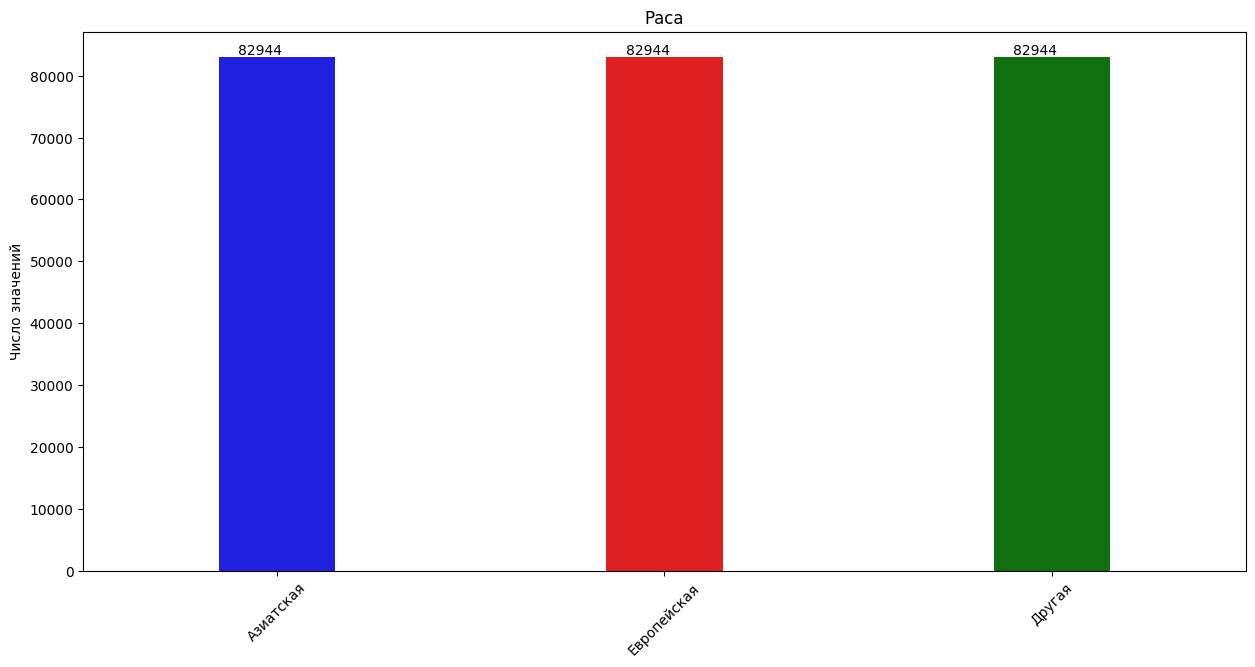


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №2: 'Пол'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' Мужской' -> кол-во: 124416
  1: ' Женский' -> кол-во: 124416


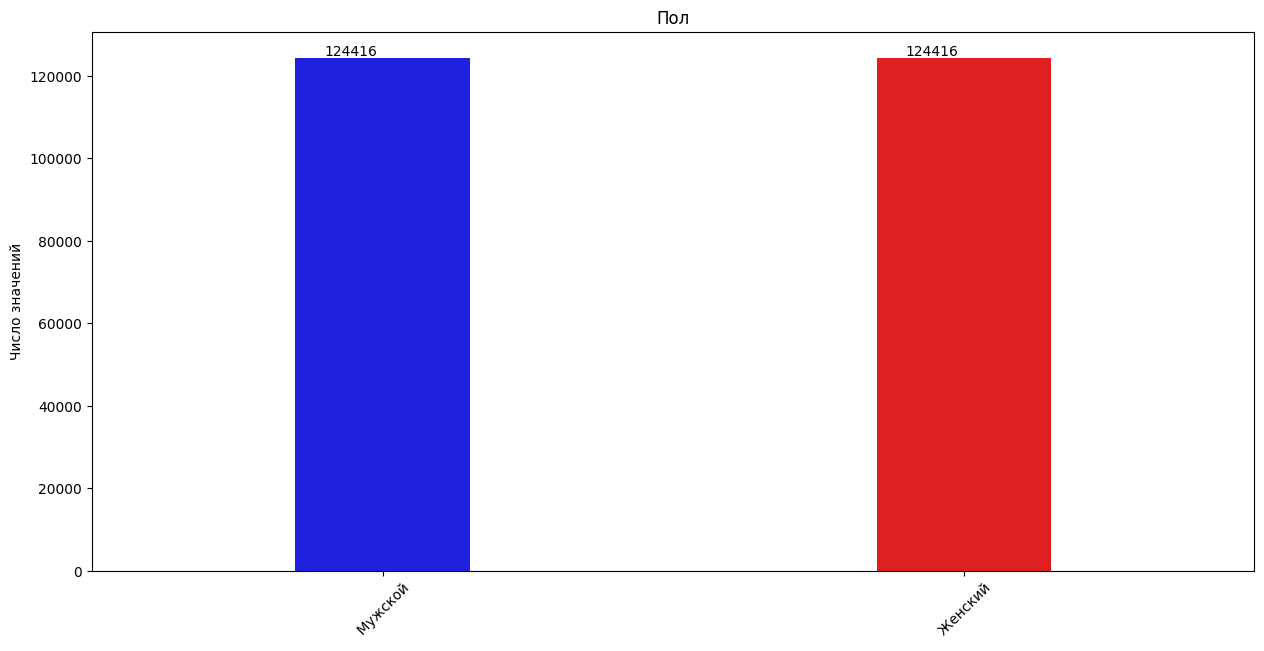


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №3: 'Возраст'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' До 70' -> кол-во: 124416
  1: ' >70' -> кол-во: 124416


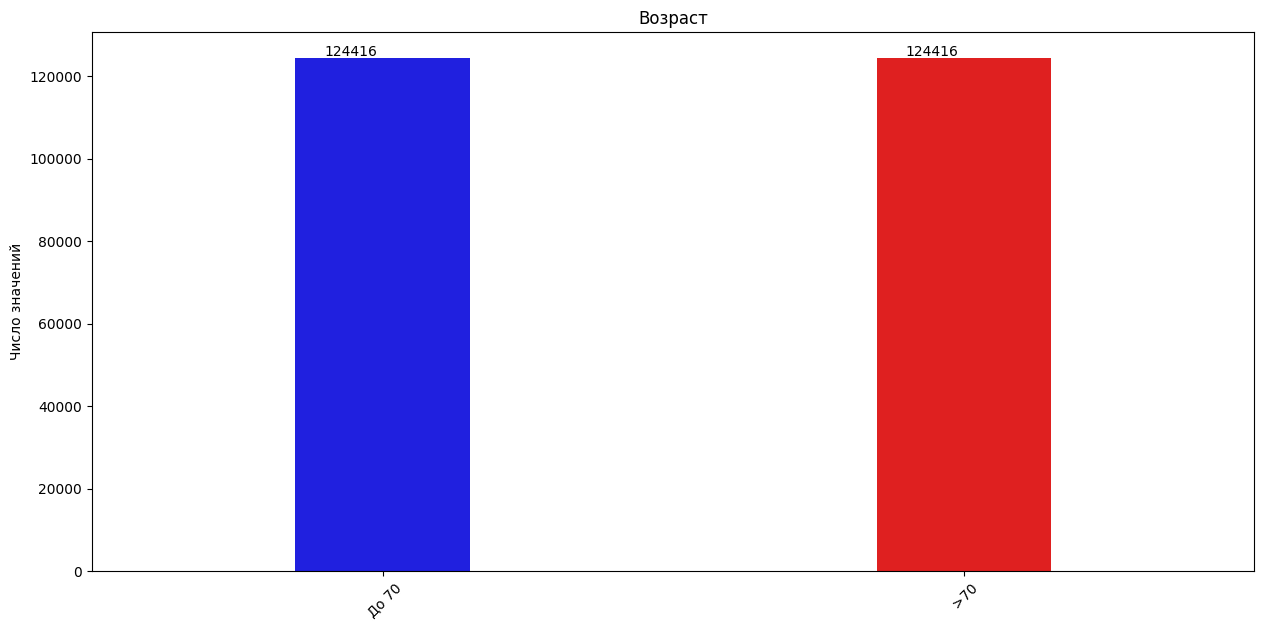


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №4: 'Статус курения'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 3
  0: ' В настоящее время' -> кол-во: 82944
  1: ' Курение в прошлом (бросил более 1 месяца до 1 года)' -> кол-во: 82944
  2: ' Курение в прошлом (бросил более 1 года)' -> кол-во: 82944


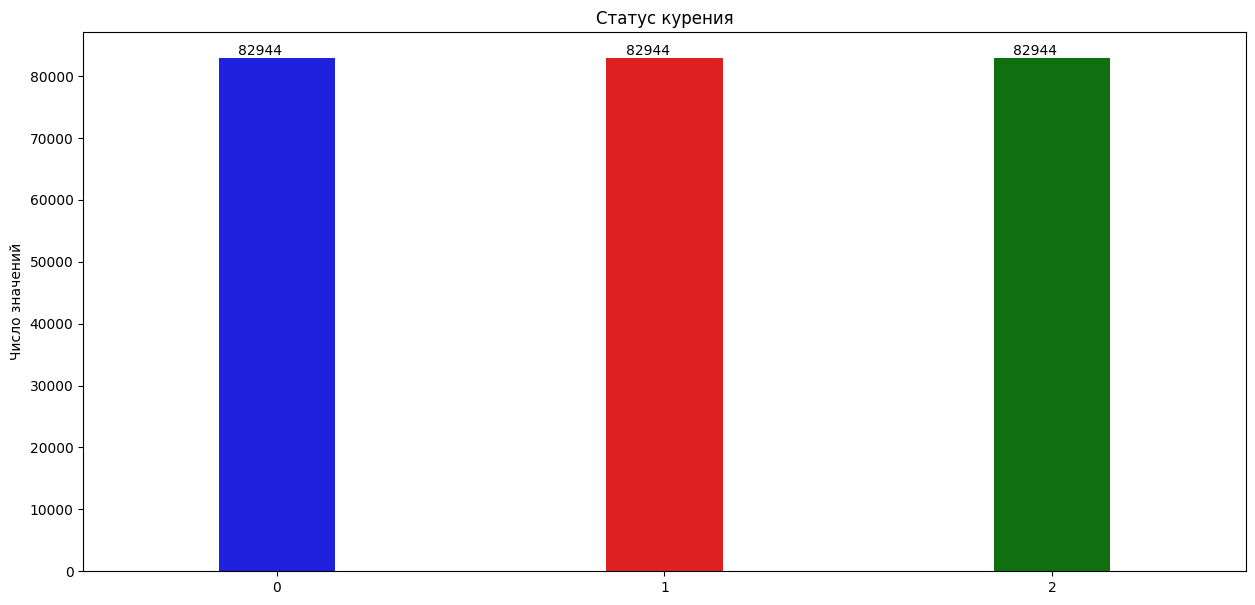


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №5: 'ECOG'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' 0-1' -> кол-во: 124416
  1: '2' -> кол-во: 124416


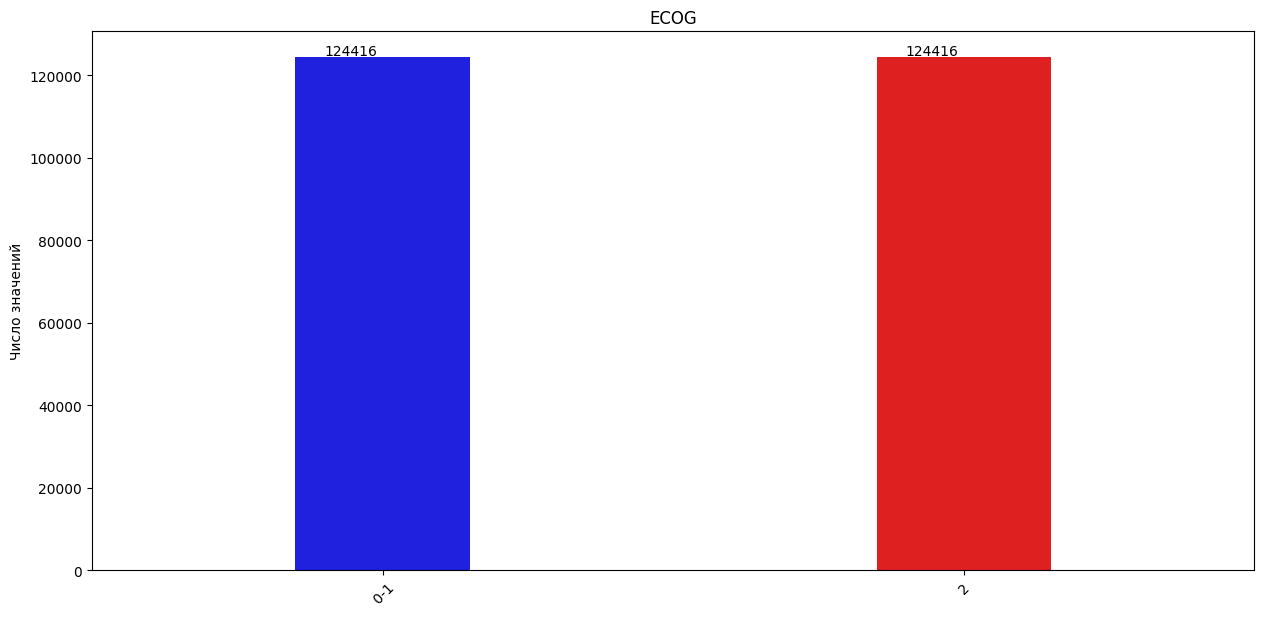


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №6: 'Есть опухолевая нагрузка? (симптомная опухоль)'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' да' -> кол-во: 124416
  1: ' нет' -> кол-во: 124416


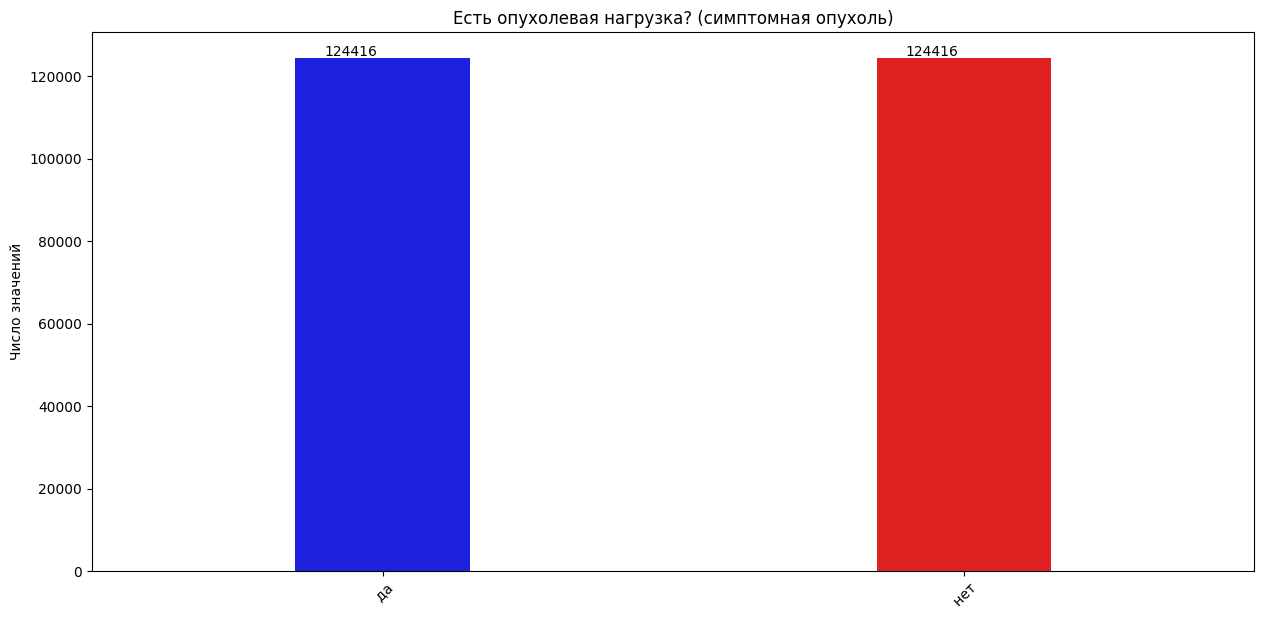


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №7: 'Ко-мутации KRAS'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' да' -> кол-во: 124416
  1: ' нет' -> кол-во: 124416


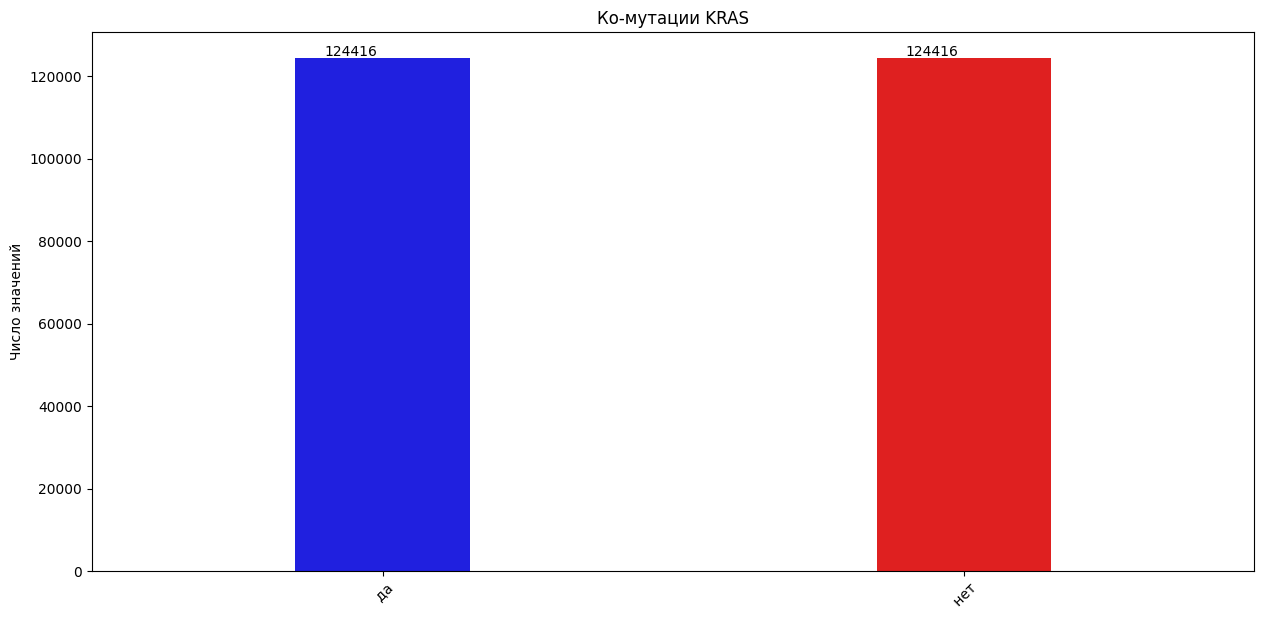


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №8: 'Ко-мутации p53.'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' да' -> кол-во: 124416
  1: ' нет' -> кол-во: 124416


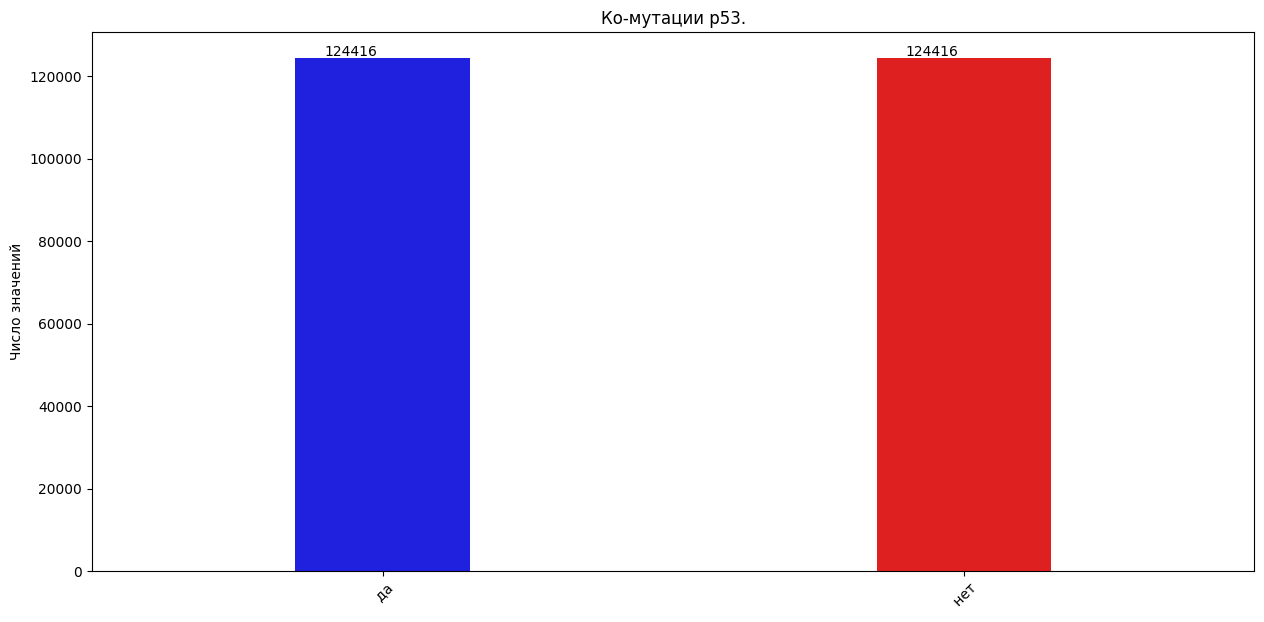


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №9: 'Ко-мутации STK11'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' да' -> кол-во: 124416
  1: ' нет' -> кол-во: 124416


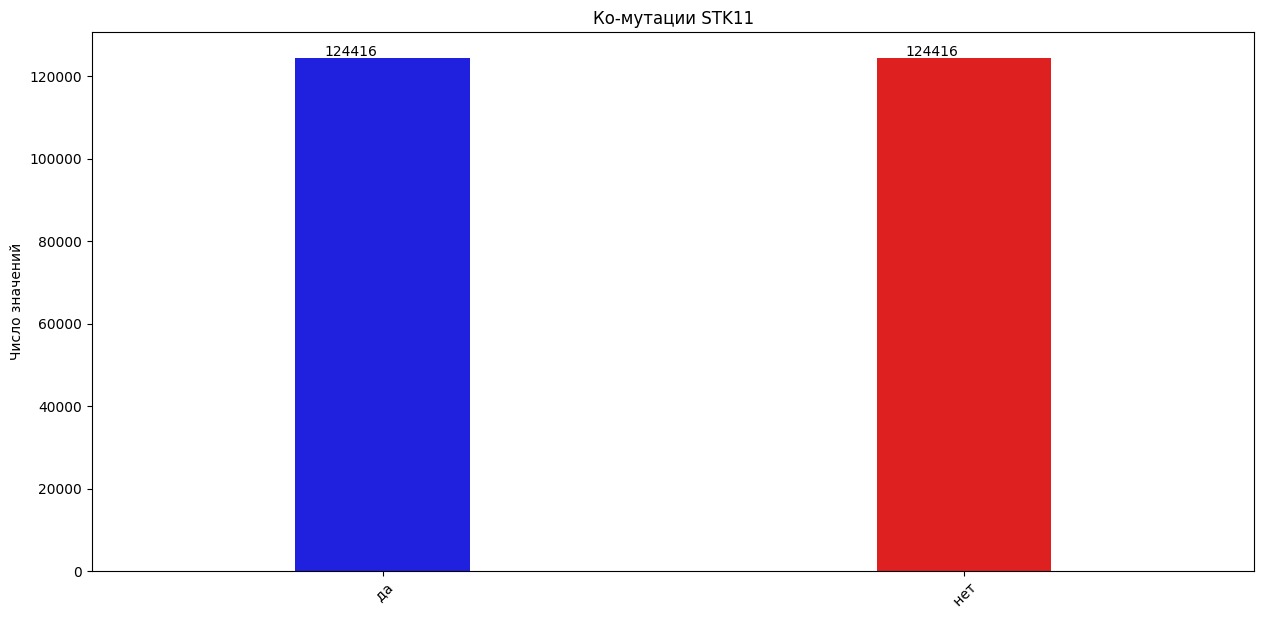


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №10: 'Ко-мутации KEAP1'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' да' -> кол-во: 124416
  1: ' нет' -> кол-во: 124416


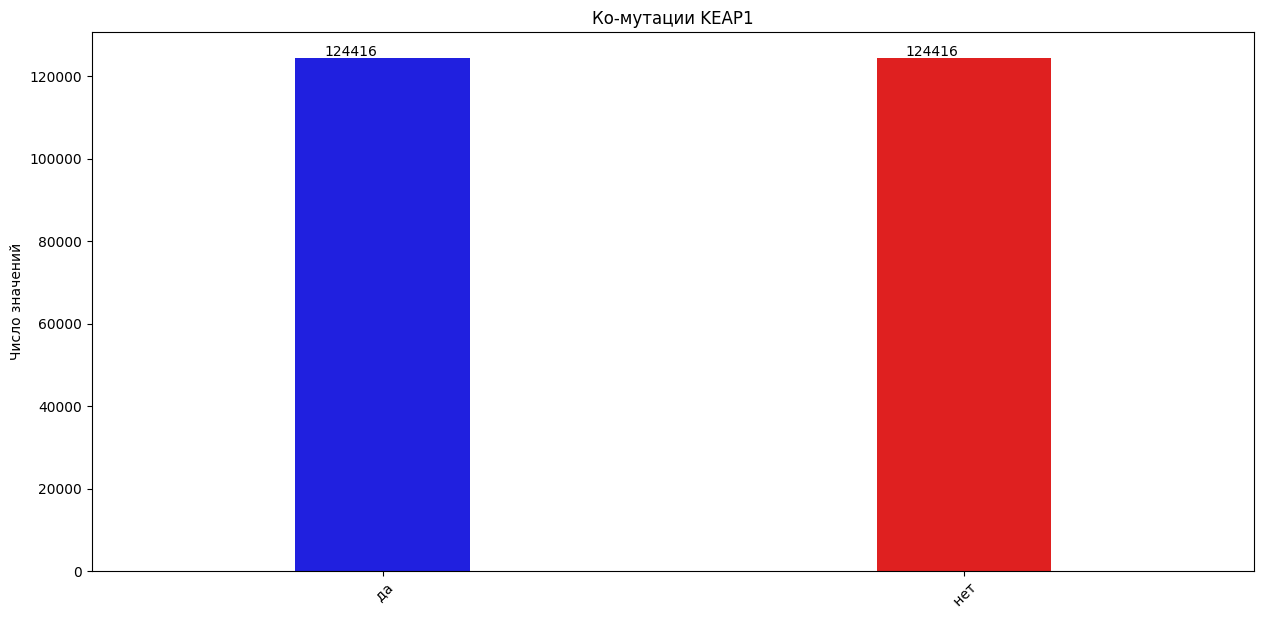


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №11: 'Срок от окончания ХЛТ'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 3
  0: 'до 42 дней' -> кол-во: 82944
  1: 'от 43 до 60 дней' -> кол-во: 82944
  2: 'более 61 дня' -> кол-во: 82944


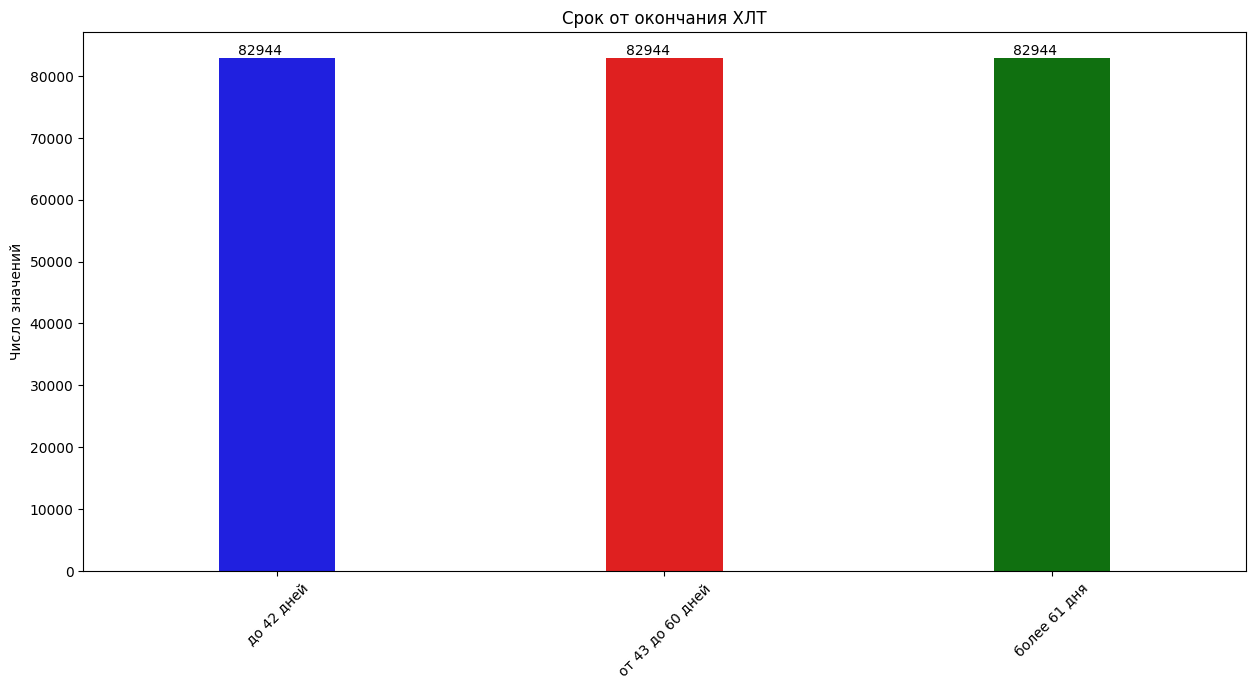


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №12: 'Молекулярный статус (только для неплоскоклеточного рака)'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 6
  0: ' нет мутаций' -> кол-во: 41472
  1: ' не исследовались' -> кол-во: 41472
  2: ' EGFR редкий вариант' -> кол-во: 41472
  3: ' EGFR ex19' -> кол-во: 41472
  4: ' EGFR ex21' -> кол-во: 41472
  5: ' ALK позитивный' -> кол-во: 41472


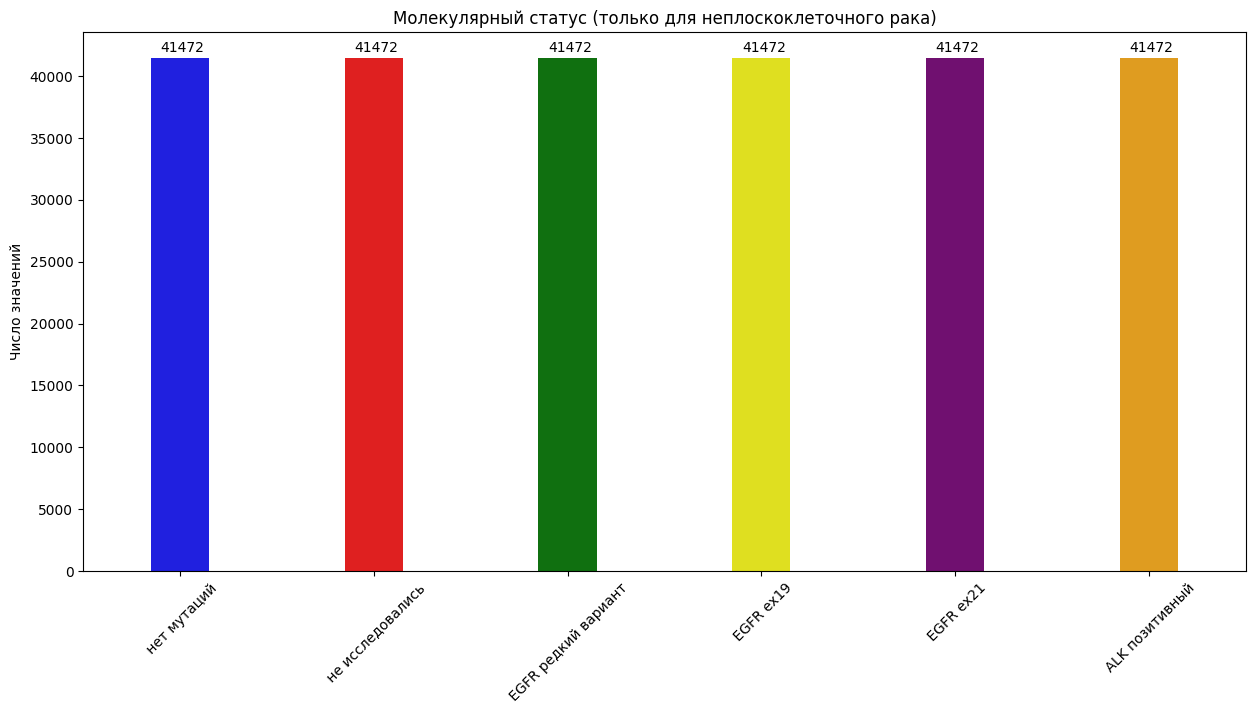


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №13: 'PD-L1 статус'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 3
  0: ' Не исследовался' -> кол-во: 82944
  1: ' Менее 1%' -> кол-во: 82944
  2: ' Более 1%' -> кол-во: 82944


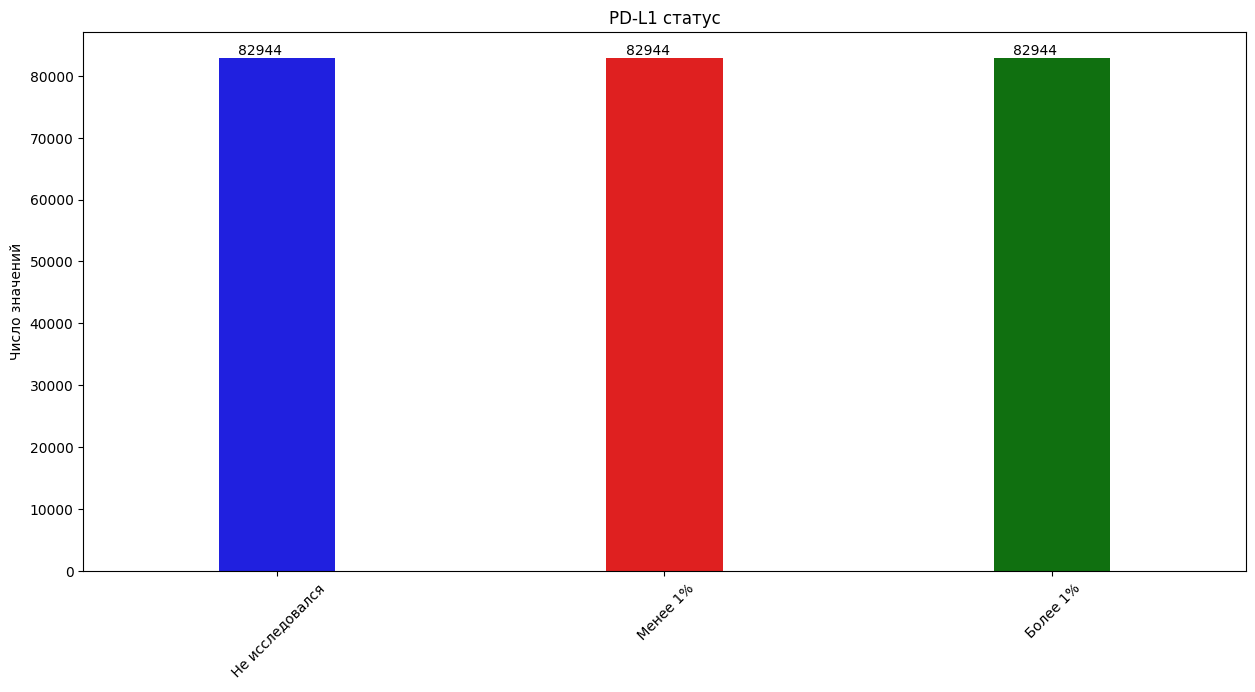


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №14: 'Предпочтение пациента по ответу на терапию'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: ' Результативность лечения' -> кол-во: 124416
  1: ' сохранение качества жизни' -> кол-во: 124416


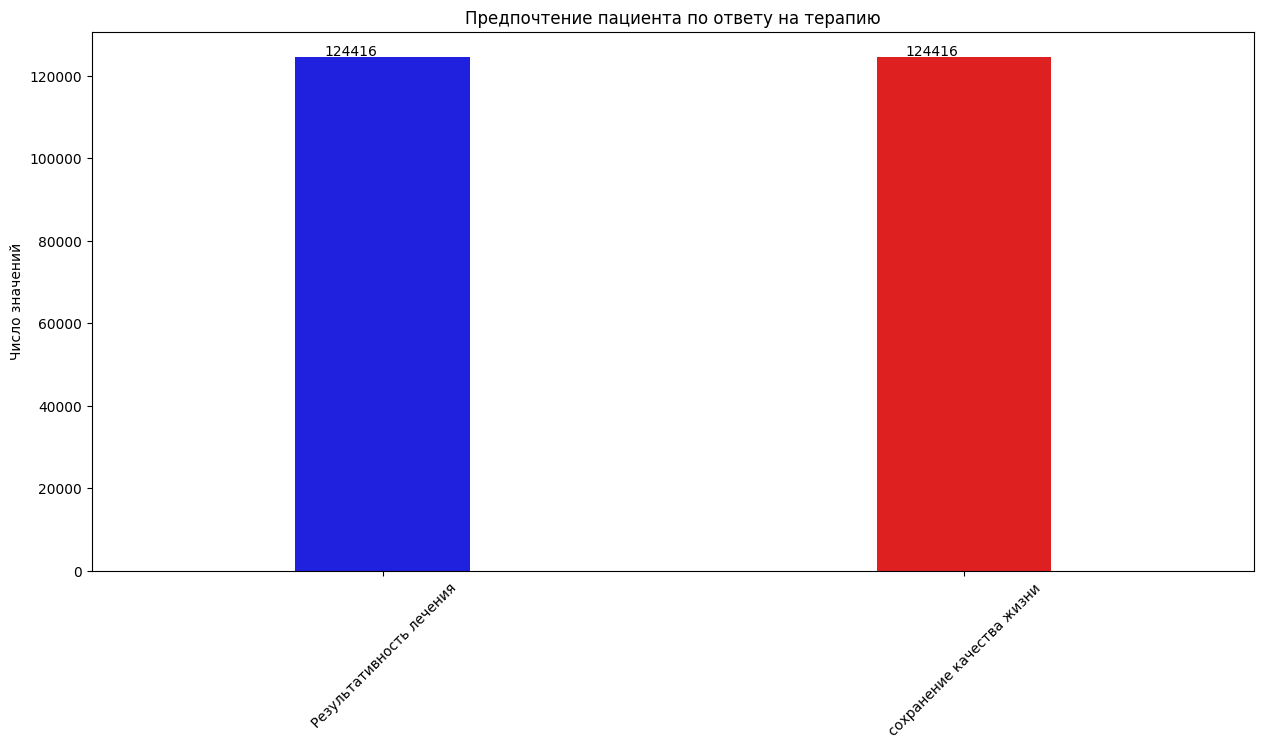


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №15: 'Ответ эксперта (Лактионов)'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 4
  0: 'Дурвалумаб' -> кол-во: 43776
  1: 'Наблюдение' -> кол-во: 140544
  2: 'Осимертиниб' -> кол-во: 41472
  3: 'Алектиниб' -> кол-во: 23040


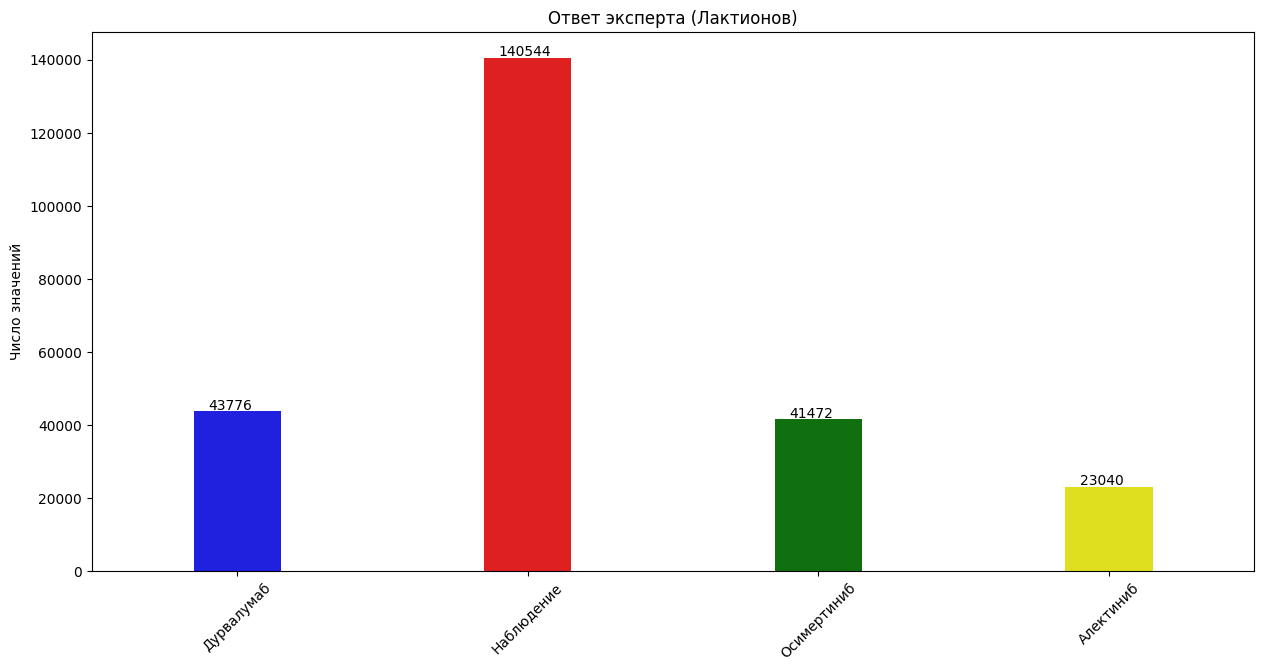


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №16: 'Поставьте галочку, если уверены на 100%'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: 'True' -> кол-во: 89856
  1: 'False' -> кол-во: 158976


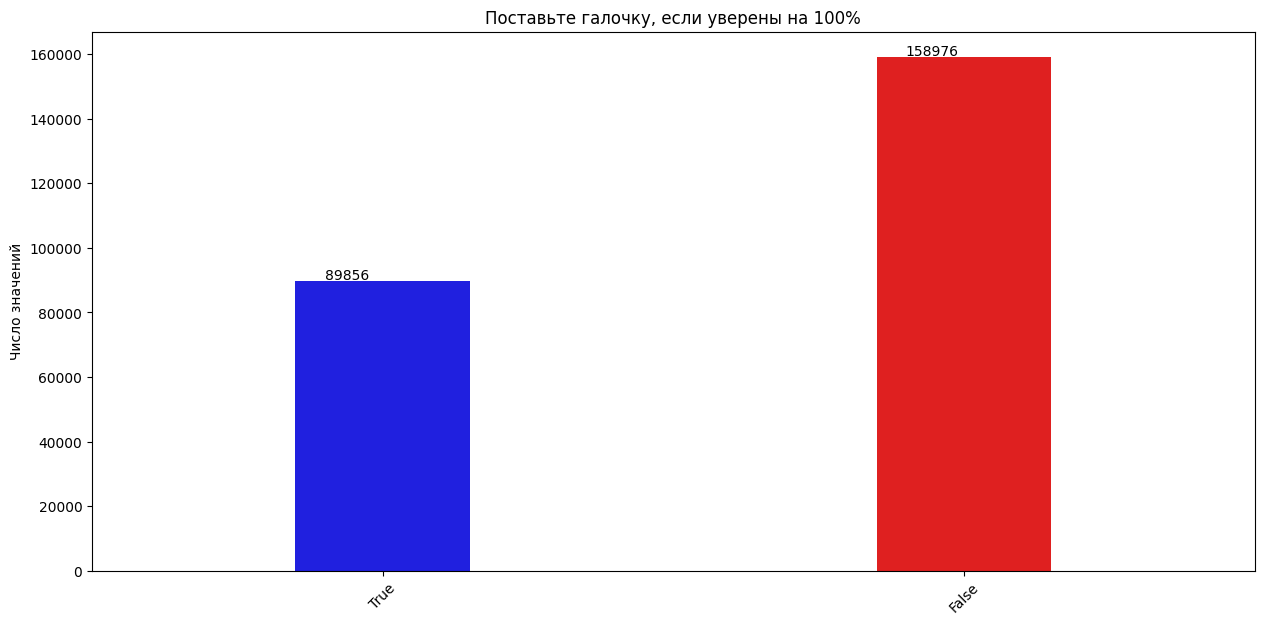


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №17: 'Если 75%'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: 'False' -> кол-во: 158976
  1: 'True' -> кол-во: 89856


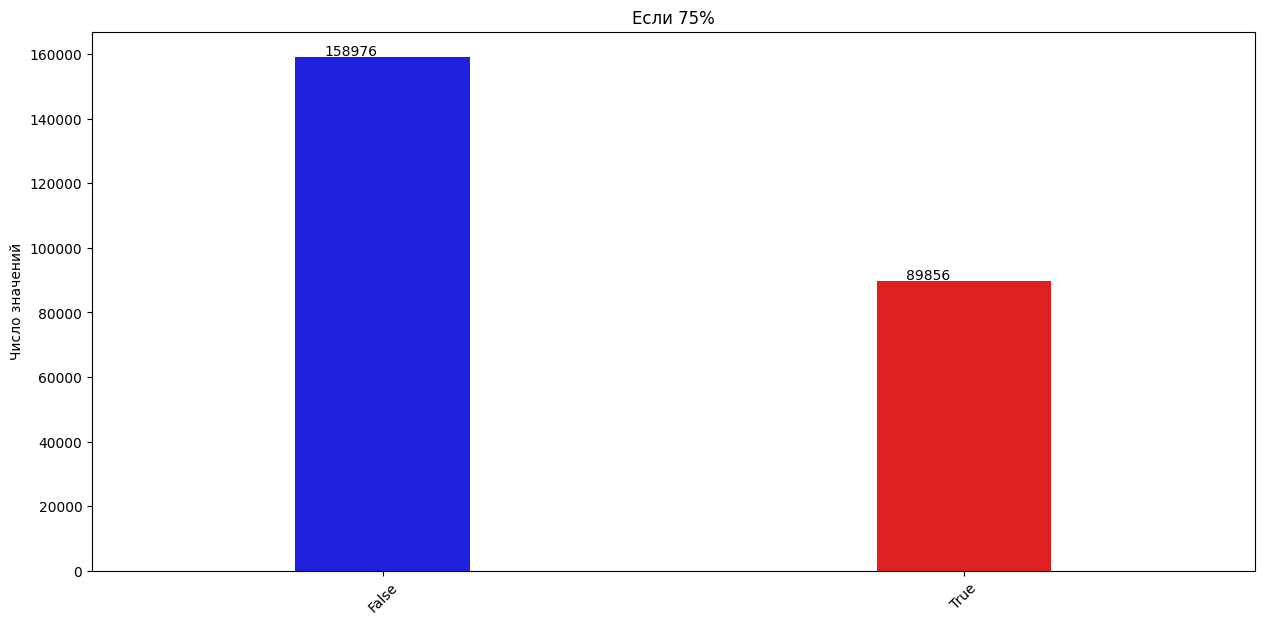


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №18: 'Если 50%'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 2
  0: 'False' -> кол-во: 179712
  1: 'True' -> кол-во: 69120


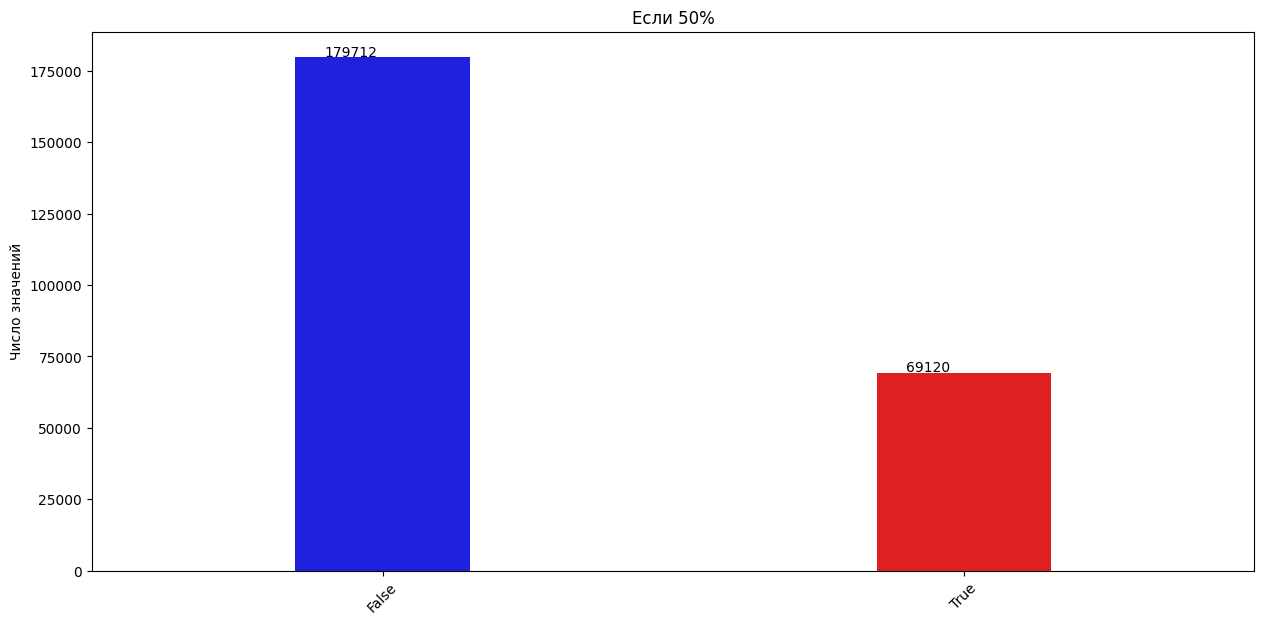


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №19: 'Альтернатива, если 50% - обязательно'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 5
  0: '0' -> кол-во: 103680
  1: 'Дурвалумаб' -> кол-во: 39168
  2: 'Наблюдение' -> кол-во: 73728
  3: 'Осимертиниб' -> кол-во: 27648
  4: 'Алектиниб' -> кол-во: 4608


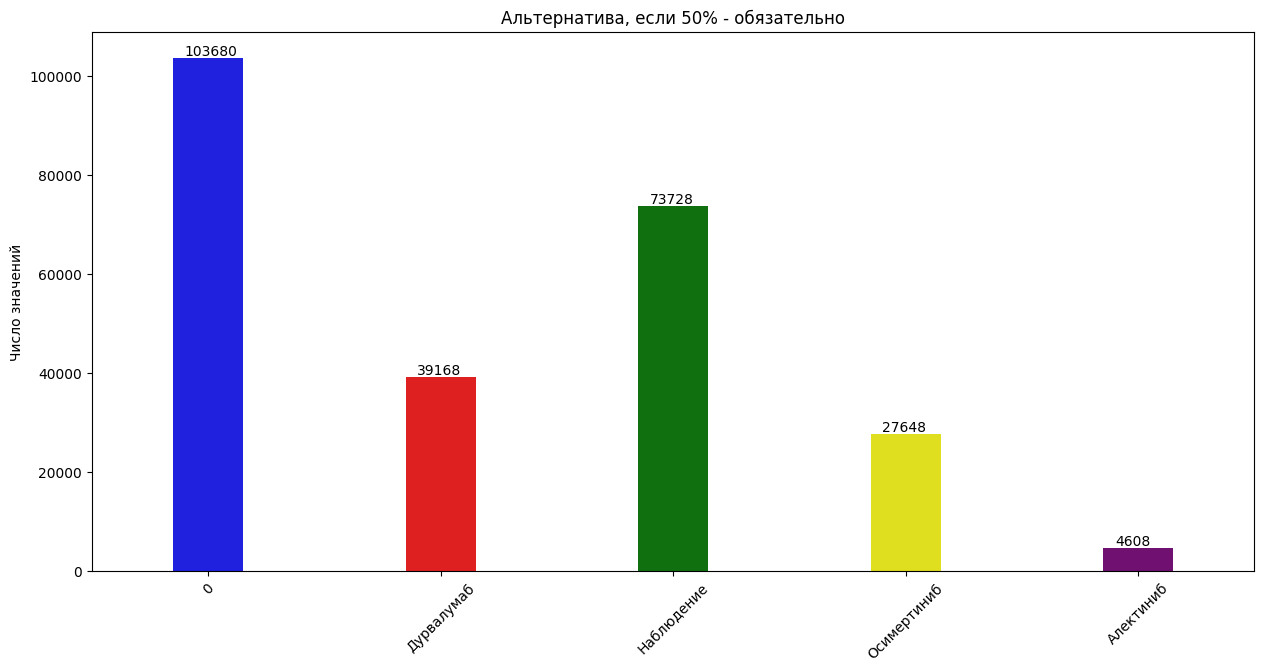


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №20: 'Комментарий'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 0
число уникальных значений: 11
  0: '0' -> кол-во: 62208
  1: 'Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ' -> кол-во: 23040
  2: 'Возможно есть мутации и эффективность Дурвалумаба будет низкой' -> кол-во: 11520
  3: 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы' -> кол-во: 59904
  4: 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне' -> кол-во: 34560
  5: 'Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы' -> кол-во: 27648
  6: 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%' -> кол-во: 9216
  7: 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, воз

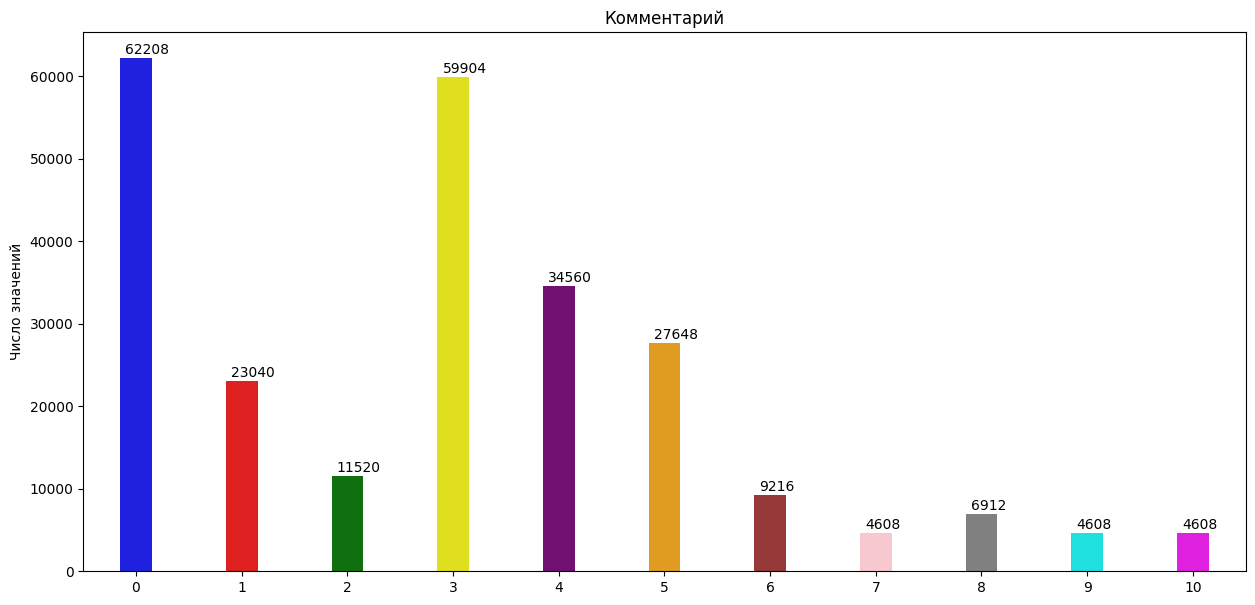


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Колонка №21: 'кПол'
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
число строк с пустыми значениями: 248832
число уникальных значений: 1


ValueError: ignored

In [ ]:
# Пробегаюсь по всем колонкам датафрейма и оцениваю балансировку
# i = 0
for col_name in df1_colnames:
  # print(f"i: {i}, col_name: '{col_name}'")
  # i += 1
  if 'id_ответа' == col_name:
    continue
  print_column_info(df1, col_name)

# Подготовка данных для нейронной сети

Для обучения нейронной сети перевожу вербальные данные колонок в числовые.

Префикс 'к' - категориальный числовой код, интерпретация этого кода в формате one-hot-encoding, multi-hot-encoding. Например, раса:

0 - 'Азиатская', 1 - 'Европейская', 2 - 'Другая',
100 - 'Азиатская', 010 - 'Европейская', 001 - 'Другая'.

In [ ]:
#cat - category
df1_cat_colnames = ['cid',
                    'кРаса',
                    'кПол',
                    'кВозраст',
                    'кСтатусКурения',
                    'cECOG',
                    'кСимптОпухоль',
                    'cCoMutKRAS',
                    'cCoMutp53',
                    'cCoMutSTK11',
                    'cCoMutKEAP1',
                    'кОкончаниеХЛТ',
                    'кМолекулСтатус',
                    'cPDL1status',
                    'кПредпочтениеПациента',
                    'кЛактионов',
                    'кУверенность100',
                    'кУверенность75',
                    'кУверенность50',
                    'кАльтернатива50',
                    'кКомментарий'
                    ]

print(f'df1_cat_colnames: {len(df1_cat_colnames)} : {df1_cat_colnames}')

df1_cat_colnames: 21 : ['cid', 'кРаса', 'кПол', 'кВозраст', 'кСтатусКурения', 'cECOG', 'кСимптОпухоль', 'cCoMutKRAS', 'cCoMutp53', 'cCoMutSTK11', 'cCoMutKEAP1', 'кОкончаниеХЛТ', 'кМолекулСтатус', 'cPDL1status', 'кПредпочтениеПациента', 'кЛактионов', 'кУверенность100', 'кУверенность75', 'кУверенность50', 'кАльтернатива50', 'кКомментарий']


## 1 - Раса

In [ ]:
def getHumanRaceCode(str_val):
  '''
  Получение категориального значения `Раса` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'Азиатская',
    1 - 'Европейская',
    2 - 'Другая'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 2
  if 'азиатская' == str2:
    retVal = 0
  elif 'европейская' == str2:
    retVal = 1

  return retVal

In [ ]:
# 1->21: 'Раса'
# добавляю колонку для категориальных данных
inx = 1
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 1, col_name: 'Раса', col_name2: 'кРаса'


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~
#~проверка кодирования
# print('~'*100)
# print('~проверка кодирования~')
# u_lst = df1[col_name].unique().tolist()
# for i in range(len(u_lst)):
#   str1 = str(u_lst[i])
#   digi_code1 = getHumanRaceCode(str1)
#   print(f"i: {i}, str1: '{str1}', digi_code1: '{digi_code1}'")

#~~~~~~~~~~~~~~~~~~~~~~~~
# создаем numpy массив integer из нулей, число элементов равно числу строк нашего data frame
i_arr = np.zeros(df1.shape[0], dtype=int)

row_inx = 0
for elem_val in df1[col_name]:
  #digi - digital
  digi_code = getHumanRaceCode(elem_val)
  i_arr[row_inx] = digi_code
  # print(f"row_inx: {row_inx}, elem_val: '{elem_val}', digi_code: '{digi_code}'")
  #~~~
  row_inx += 1

# Преобразование массива в формат one-hot-encoding (3-класса)
i_arr2 = utils.to_categorical(i_arr, 3)
ohe_lst2 = i_arr2.astype(int).tolist()
#~~~
#col_name2
df1 = df1.assign(кРаса=ohe_lst2)
#~~~
del i_arr2
del ohe_lst2

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 24)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий,кПол,кКомментарий,кРаса
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Результативность лечения,Дурвалумаб,True,False,False,0,0,NaN,NaN,"[1, 0, 0]"
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Результативность лечения,Дурвалумаб,True,False,False,0,0,NaN,NaN,"[1, 0, 0]"
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...,NaN,NaN,"[1, 0, 0]"


## 2 - Пол

In [ ]:
def getGenderCode(str_val):
  '''
  Получение категориального значения `Пол` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'мужской',
    1 - 'женский'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 1
  if 'мужской' == str2:
    retVal = 0

  return retVal

In [ ]:
# 2->21: 'Пол'
inx = 2
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 2, col_name: 'Пол', col_name2: 'кПол'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getGenderCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(кПол=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 24)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий,кПол,кКомментарий,кРаса
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Результативность лечения,Дурвалумаб,True,False,False,0,0,0,NaN,"[1, 0, 0]"
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Результативность лечения,Дурвалумаб,True,False,False,0,0,0,NaN,"[1, 0, 0]"
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...,0,NaN,"[1, 0, 0]"


## 3 - Возраст

In [ ]:
def getAgeCode(str_val):
  '''
  Получение категориального значения `Возраст` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'до 70',
    1 - '>70'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 1
  if 'до 70' == str2:
    retVal = 0

  return retVal

In [ ]:
# 3->21: 'Возраст'
inx = 3
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 3, col_name: 'Возраст', col_name2: 'кВозраст'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getAgeCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(кВозраст=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 24)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий,кРаса,кПол,кВозраст
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Результативность лечения,Дурвалумаб,True,False,False,0,0,"[1, 0, 0]",0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Результативность лечения,Дурвалумаб,True,False,False,0,0,"[1, 0, 0]",0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...,"[1, 0, 0]",0,0


## 4 - Статус курения

In [ ]:
def getSmokingStatusCode(str_val):
  '''
  Получение категориального значения `Статус курения` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'в настоящее время',
    1 - 'курение в прошлом (бросил более 1 месяца до 1 года)',
    2 - 'курение в прошлом (бросил более 1 года)'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 2
  if 'в настоящее время' == str2:
    retVal = 0
  elif 'курение в прошлом (бросил более 1 месяца до 1 года)' == str2:
    retVal = 1

  return retVal

In [ ]:
# 4->21: 'Статус курения'
inx = 4
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 4, col_name: 'Статус курения', col_name2: 'кСтатусКурения'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getSmokingStatusCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

# Преобразование массива в формат one-hot-encoding (3-класса)
i_arr2 = utils.to_categorical(i_arr, 3)
ohe_lst2 = i_arr2.astype(int).tolist()

#~~~
#col_name2
df1 = df1.assign(кСтатусКурения=ohe_lst2)
#~~~

del i_arr2
del ohe_lst2

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 25)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий,кРаса,кПол,кВозраст,кСтатусКурения
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Дурвалумаб,True,False,False,0,0,"[1, 0, 0]",0,0,"[1, 0, 0]"
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Дурвалумаб,True,False,False,0,0,"[1, 0, 0]",0,0,"[1, 0, 0]"
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...,"[1, 0, 0]",0,0,"[1, 0, 0]"


## 5 - ECOG

In [ ]:
def getECOGCode(str_val):
  '''
  Получение категориального значения `ECOG` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - '0-1',
    1 - '2'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 1
  if '0-1' == str2:
    retVal = 0

  return retVal

In [ ]:
# 5->21: 'ECOG'
inx = 5
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 5, col_name: 'ECOG', col_name2: 'cECOG'


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~
#~проверка кодирования
print('~'*100)
print('~проверка кодирования~')
u_lst = df1[col_name].unique().tolist()
for i in range(len(u_lst)):
  str1 = str(u_lst[i])
  digi_code1 = getECOGCode(str1)
  print(f"i: {i}, str1: '{str1}', digi_code1: '{digi_code1}'")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~проверка кодирования~
i: 0, str1: ' 0-1', digi_code1: '0'
i: 1, str1: '2', digi_code1: '1'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getECOGCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(cECOG=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 26)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий,кРаса,кПол,кВозраст,кСтатусКурения,cECOG
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,True,False,False,0,0,"[1, 0, 0]",0,0,"[1, 0, 0]",0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,True,False,False,0,0,"[1, 0, 0]",0,0,"[1, 0, 0]",0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...,"[1, 0, 0]",0,0,"[1, 0, 0]",0


## 6 - Есть опухолевая нагрузка? (симптомная опухоль)

In [ ]:
def getNoYesCode(str_val):
  '''
  Получение категориального значения `нет-да` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'нет',
    1 - 'да'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 1
  if 'нет' == str2:
    retVal = 0

  return retVal

In [ ]:
# 6->21: 'Есть опухолевая нагрузка? (симптомная опухоль)'
inx = 6
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 6, col_name: 'Есть опухолевая нагрузка? (симптомная опухоль)', col_name2: 'кСимптОпухоль'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getNoYesCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(кСимптОпухоль=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 27)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий,кРаса,кПол,кВозраст,кСтатусКурения,cECOG,кСимптОпухоль
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,False,False,0,0,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,False,False,0,0,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1


## 7 - Ко-мутации KRAS

In [ ]:
# 7->21: 'Ко-мутации KRAS'
inx = 7
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 7, col_name: 'Ко-мутации KRAS', col_name2: 'cCoMutKRAS'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getNoYesCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(cCoMutKRAS=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 28)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий,кРаса,кПол,кВозраст,кСтатусКурения,cECOG,кСимптОпухоль,cCoMutKRAS
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,False,0,0,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1,1
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,False,0,0,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1,1
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,False,Дурвалумаб,Нет доказательной базы для назначения после пе...,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1,1


## 8 - Ко-мутации p53.

In [ ]:
# 8->21: 'Ко-мутации p53.'
inx = 8
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 8, col_name: 'Ко-мутации p53.', col_name2: 'cCoMutp53'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getNoYesCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(cCoMutp53=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

## 9 - Ко-мутации STK11

In [ ]:
# 9->21: 'Ко-мутации STK11'
inx = 9
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 9, col_name: 'Ко-мутации STK11', col_name2: 'cCoMutSTK11'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getNoYesCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(cCoMutSTK11=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 30)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Комментарий,кРаса,кПол,кВозраст,кСтатусКурения,cECOG,кСимптОпухоль,cCoMutKRAS,cCoMutp53,cCoMutSTK11
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1,1,1,1
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1,1,1,1
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,Нет доказательной базы для назначения после пе...,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1,1,1,1


## 10 - Ко-мутации KEAP1

In [ ]:
# 10->21: 'Ко-мутации KEAP1'
inx = 10
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 10, col_name: 'Ко-мутации KEAP1', col_name2: 'cCoMutKEAP1'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getNoYesCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(cCoMutKEAP1=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 31)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,кРаса,кПол,кВозраст,кСтатусКурения,cECOG,кСимптОпухоль,cCoMutKRAS,cCoMutp53,cCoMutSTK11,cCoMutKEAP1
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1,1,1,1,1
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1,1,1,1,1
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,"[1, 0, 0]",0,0,"[1, 0, 0]",0,1,1,1,1,1


## 11 - Срок от окончания ХЛТ

In [ ]:
def getFinishChemoRadioTherapyCode(str_val):
  '''
  Получение категориального значения `Срок от окончания ХЛТ` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'до 42 дней',
    1 - 'от 43 до 60 дней',
    2 - 'более 61 дня'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 2
  if 'до 42 дней' == str2:
    retVal = 0
  elif 'от 43 до 60 дней' == str2:
    retVal = 1

  return retVal

In [ ]:
# 11->21: 'Срок от окончания ХЛТ'
inx = 11
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 11, col_name: 'Срок от окончания ХЛТ', col_name2: 'кОкончаниеХЛТ'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getFinishChemoRadioTherapyCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

# Преобразование массива в формат one-hot-encoding (3-класса)
i_arr2 = utils.to_categorical(i_arr, 3)
ohe_lst2 = i_arr2.astype(int).tolist()
#~~~
#col_name2
df1 = df1.assign(кОкончаниеХЛТ=ohe_lst2)
#~~~
del i_arr2
del ohe_lst2

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 32)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,кПол,кВозраст,кСтатусКурения,cECOG,кСимптОпухоль,cCoMutKRAS,cCoMutp53,cCoMutSTK11,cCoMutKEAP1,кОкончаниеХЛТ
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,0,"[1, 0, 0]",0,1,1,1,1,1,"[1, 0, 0]"
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,0,"[1, 0, 0]",0,1,1,1,1,1,"[0, 1, 0]"
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,0,"[1, 0, 0]",0,1,1,1,1,1,"[0, 0, 1]"


## 12 - Молекулярный статус (только для неплоскоклеточного рака)

In [ ]:
def getMolecularStatusCode(str_val):
  '''
  Получение категориального значения `Молекулярный статус (только для неплоскоклеточного рака)` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'нет мутаций',
    1 - 'не исследовались',
    2 - 'egfr редкий вариант'
    3 - 'egfr ex19'
    4 - 'egfr ex21'
    5 - 'alk позитивный'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 5
  if 'нет мутаций' == str2:
    retVal = 0
  elif 'не исследовались' == str2:
    retVal = 1
  elif 'egfr редкий вариант' == str2:
    retVal = 2
  elif 'egfr ex19' == str2:
    retVal = 3
  elif 'egfr ex21' == str2:
    retVal = 4

  return retVal

In [ ]:
# 12->21: 'Молекулярный статус (только для неплоскоклеточного рака)'
inx = 12
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 12, col_name: 'Молекулярный статус (только для неплоскоклеточного рака)', col_name2: 'кМолекулСтатус'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getMolecularStatusCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

# Преобразование массива в формат one-hot-encoding (6-классов)
i_arr2 = utils.to_categorical(i_arr, 6)
ohe_lst2 = i_arr2.astype(int).tolist()
#~~~
#col_name2
df1 = df1.assign(кМолекулСтатус=ohe_lst2)
#~~~
del i_arr2
del ohe_lst2

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 33)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,кВозраст,кСтатусКурения,cECOG,кСимптОпухоль,cCoMutKRAS,cCoMutp53,cCoMutSTK11,cCoMutKEAP1,кОкончаниеХЛТ,кМолекулСтатус
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,"[1, 0, 0]",0,1,1,1,1,1,"[1, 0, 0]","[1, 0, 0, 0, 0, 0]"
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,"[1, 0, 0]",0,1,1,1,1,1,"[0, 1, 0]","[1, 0, 0, 0, 0, 0]"
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,"[1, 0, 0]",0,1,1,1,1,1,"[0, 0, 1]","[1, 0, 0, 0, 0, 0]"


## 13 - PD-L1 статус

In [ ]:
def getPDL1StatusCode(str_val):
  '''
  Получение категориального значения `PD-L1 статус` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'не исследовался',
    1 - 'менее 1%',
    2 - 'более 1%'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 2
  if 'не исследовался' == str2:
    retVal = 0
  elif 'менее 1%' == str2:
    retVal = 1

  return retVal

In [ ]:
# 13->21: 'PD-L1 статус'
inx = 13
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 13, col_name: 'PD-L1 статус', col_name2: 'cPDL1status'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getPDL1StatusCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

# Преобразование массива в формат one-hot-encoding (3-класса)
i_arr2 = utils.to_categorical(i_arr, 3)
ohe_lst2 = i_arr2.astype(int).tolist()
#~~~
#col_name2
df1 = df1.assign(cPDL1status=ohe_lst2)
#~~~
del i_arr2
del ohe_lst2

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 34)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,кСтатусКурения,cECOG,кСимптОпухоль,cCoMutKRAS,cCoMutp53,cCoMutSTK11,cCoMutKEAP1,кОкончаниеХЛТ,кМолекулСтатус,cPDL1status
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,"[1, 0, 0]",0,1,1,1,1,1,"[1, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]"
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,"[1, 0, 0]",0,1,1,1,1,1,"[0, 1, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]"
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,"[1, 0, 0]",0,1,1,1,1,1,"[0, 0, 1]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]"


## 14 - Предпочтение пациента по ответу на терапию

In [ ]:
def getPatientPreferenceCode(str_val):
  '''
  Получение категориального значения `Предпочтение пациента по ответу на терапию` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'результативность лечения',
    1 - 'сохранение качества жизни'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 1
  if 'результативность лечения' == str2:
    retVal = 0

  return retVal

In [ ]:
# 14->21: 'Предпочтение пациента по ответу на терапию'
inx = 14
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 14, col_name: 'Предпочтение пациента по ответу на терапию', col_name2: 'кПредпочтениеПациента'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getPatientPreferenceCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(кПредпочтениеПациента=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 35)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,cECOG,кСимптОпухоль,cCoMutKRAS,cCoMutp53,cCoMutSTK11,cCoMutKEAP1,кОкончаниеХЛТ,кМолекулСтатус,cPDL1status,кПредпочтениеПациента
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,1,1,1,1,1,"[1, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,1,1,1,1,1,"[0, 1, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,0,1,1,1,1,1,"[0, 0, 1]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0


## 15 - Ответ эксперта (Лактионов)

In [ ]:
def getLaktionovCode(str_val):
  '''
  Получение категориального значения `Ответ эксперта (Лактионов)` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'наблюдение',
    1 - 'дурвалумаб',
    2 - 'осимертиниб'
    3 - 'алектиниб'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 3
  if 'наблюдение' == str2:
    retVal = 0
  elif 'дурвалумаб' == str2:
    retVal = 1
  elif 'осимертиниб' == str2:
    retVal = 2

  return retVal

In [ ]:
# 15->21: 'Ответ эксперта (Лактионов)'
inx = 15
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 15, col_name: 'Ответ эксперта (Лактионов)', col_name2: 'кЛактионов'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getLaktionovCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

# Преобразование массива в формат one-hot-encoding (4-класса)
i_arr2 = utils.to_categorical(i_arr, 4)
ohe_lst2 = i_arr2.astype(int).tolist()
#~~~
#col_name2
df1 = df1.assign(кЛактионов=ohe_lst2)
#~~~
del i_arr2
del ohe_lst2

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 36)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,кСимптОпухоль,cCoMutKRAS,cCoMutp53,cCoMutSTK11,cCoMutKEAP1,кОкончаниеХЛТ,кМолекулСтатус,cPDL1status,кПредпочтениеПациента,кЛактионов
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,1,1,1,"[1, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[0, 1, 0, 0]"
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,1,1,1,"[0, 1, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[0, 1, 0, 0]"
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,1,1,1,"[0, 0, 1]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[1, 0, 0, 0]"


## 16 - Поставьте галочку, если уверены на 100%

In [ ]:
def getFalseTrueCode(str_val):
  '''
  Получение категориального значения `false-true` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - 'false',
    1 - 'true'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 1
  if 'false' == str2:
    retVal = 0

  return retVal

In [ ]:
# 16->21: 'Поставьте галочку, если уверены на 100%'
inx = 16
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 16, col_name: 'Поставьте галочку, если уверены на 100%', col_name2: 'кУверенность100'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getFalseTrueCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(кУверенность100=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 37)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,cCoMutKRAS,cCoMutp53,cCoMutSTK11,cCoMutKEAP1,кОкончаниеХЛТ,кМолекулСтатус,cPDL1status,кПредпочтениеПациента,кЛактионов,кУверенность100
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,1,1,"[1, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[0, 1, 0, 0]",1
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,1,1,"[0, 1, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[0, 1, 0, 0]",1
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,1,1,"[0, 0, 1]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[1, 0, 0, 0]",0


## 17 - Если 75%

In [ ]:
# 17->21: 'Если 75%'
inx = 17
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 17, col_name: 'Если 75%', col_name2: 'кУверенность75'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getFalseTrueCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(кУверенность75=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 38)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,cCoMutp53,cCoMutSTK11,cCoMutKEAP1,кОкончаниеХЛТ,кМолекулСтатус,cPDL1status,кПредпочтениеПациента,кЛактионов,кУверенность100,кУверенность75
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,1,"[1, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[0, 1, 0, 0]",1,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,1,"[0, 1, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[0, 1, 0, 0]",1,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,1,"[0, 0, 1]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[1, 0, 0, 0]",0,1


## 18 - Если 50%

In [ ]:
# 18->21: 'Если 50%'
inx = 18
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 18, col_name: 'Если 50%', col_name2: 'кУверенность50'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getFalseTrueCode(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

#~~~
#col_name2
df1 = df1.assign(кУверенность50=i_arr)
#~~~

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 39)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,cCoMutSTK11,cCoMutKEAP1,кОкончаниеХЛТ,кМолекулСтатус,cPDL1status,кПредпочтениеПациента,кЛактионов,кУверенность100,кУверенность75,кУверенность50
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,"[1, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[0, 1, 0, 0]",1,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,"[0, 1, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[0, 1, 0, 0]",1,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,1,"[0, 0, 1]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[1, 0, 0, 0]",0,1,0


## 19 - Альтернатива, если 50% - обязательно

In [ ]:
def getAlternative50Code(str_val):
  '''
  Получение категориального значения `Альтернатива, если 50% - обязательно` по текстовому значению

  Args:
    str_val - текстовое значение

  Returns:
    0 - '0',
    1 - 'наблюдение',
    2 - 'дурвалумаб'
    3 - 'осимертиниб'
    4 - 'алектиниб'
  '''

  str1 = str(str_val)
  str2 = str1.lower().strip()
  retVal = 4
  if '0' == str2:
    retVal = 0
  elif 'наблюдение' == str2:
    retVal = 1
  elif 'дурвалумаб' == str2:
    retVal = 2
  elif 'осимертиниб' == str2:
    retVal = 3
  elif 'алектиниб' == str2:
    retVal = 4

  return retVal

In [ ]:
# 19->21: 'Альтернатива, если 50% - обязательно'
inx = 19
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 19, col_name: 'Альтернатива, если 50% - обязательно', col_name2: 'кАльтернатива50'


In [ ]:
#~проверка кодирования
print('~'*100)
print('~проверка кодирования~')
u_lst = df1[col_name].unique().tolist()
for i in range(len(u_lst)):
  str1 = str(u_lst[i])
  digi_code1 = getAlternative50Code(str1)
  print(f"i: {i}, str1: '{str1}', digi_code1: '{digi_code1}'")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~проверка кодирования~
i: 0, str1: '0', digi_code1: '0'
i: 1, str1: 'Дурвалумаб', digi_code1: '2'
i: 2, str1: 'Наблюдение', digi_code1: '1'
i: 3, str1: 'Осимертиниб', digi_code1: '3'
i: 4, str1: 'Алектиниб', digi_code1: '4'


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  digi_code = getAlternative50Code(elem_val)
  i_arr[row_inx] = digi_code
  row_inx += 1

# Преобразование массива в формат one-hot-encoding (5-классов)
i_arr2 = utils.to_categorical(i_arr, 5)
ohe_lst2 = i_arr2.astype(int).tolist()
#~~~
#col_name2
df1 = df1.assign(кАльтернатива50=ohe_lst2)
#~~~
del i_arr2
del ohe_lst2

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

размеры датафрейма df1: (248832, 40)


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,cCoMutKEAP1,кОкончаниеХЛТ,кМолекулСтатус,cPDL1status,кПредпочтениеПациента,кЛактионов,кУверенность100,кУверенность75,кУверенность50,кАльтернатива50
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,"[1, 0, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[0, 1, 0, 0]",1,0,0,"[1, 0, 0, 0, 0]"
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,"[0, 1, 0]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[0, 1, 0, 0]",1,0,0,"[1, 0, 0, 0, 0]"
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,1,"[0, 0, 1]","[1, 0, 0, 0, 0, 0]","[1, 0, 0]",0,"[1, 0, 0, 0]",0,1,0,"[0, 0, 1, 0, 0]"


## 20 - Комментарий

In [ ]:
# 20->21: 'Комментарий'
inx = 20
col_name = df1_colnames[inx]
col_name2 = df1_cat_colnames[inx]
print(f"inx: {inx}, col_name: '{col_name}', col_name2: '{col_name2}'")

df1[col_name2] = pd.Series(dtype='int')

inx: 20, col_name: 'Комментарий', col_name2: 'кКомментарий'


In [ ]:
u_lst = df1[col_name].unique().tolist()
u_lst2 = list()
for i in range(len(u_lst)):
  str2 = str(u_lst[i])
  u_lst2.append(str2)
  print(f'i: {i}: {u_lst2[i]}')
print(f'length u_lst2: {len(u_lst2)}')

i: 0: 0
i: 1: Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ
i: 2: Возможно есть мутации и эффективность Дурвалумаба будет низкой
i: 3: Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы
i: 4: Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне
i: 5: Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы
i: 6: Возможна низкая эффективность Дурвалумаба при PD-1 < 1%
i: 7: Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации
i: 8: Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба
i: 9: Возможно есть мутации и эффективность Дурвалумаба будет низкой
, Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба
i: 10: Возможно есть мутации и эффективность Дурвалумаба будет низкой
, Возможна низкая эффективность Дурвалумаба при PD-1 < 1%
length u_lst2: 11


In [ ]:
row_inx = 0
for elem_val in df1[col_name]:
  str2 = str(elem_val)
  digi_code = u_lst2.index(str2)
  i_arr[row_inx] = digi_code
  row_inx += 1

# Преобразование массива в формат one-hot-encoding (11-классов)
i_arr2 = utils.to_categorical(i_arr, 11)
ohe_lst2 = i_arr2.astype(int).tolist()
#~~~
#col_name2
df1 = df1.assign(кКомментарий=ohe_lst2)
#~~~
del i_arr2
del ohe_lst2

print(f'размеры датафрейма df1: {df1.shape}')
print('='*50)
df1.head(3)

NameError: ignored

In [ ]:
df1.tail(3)

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,кОкончаниеХЛТ,кМолекулСтатус,cPDL1status,кПредпочтениеПациента,кЛактионов,кУверенность100,кУверенность75,кУверенность50,кАльтернатива50,кКомментарий
248829,248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,"[1, 0, 0]","[0, 0, 0, 0, 0, 1]","[0, 0, 1]",1,"[0, 0, 0, 1]",0,0,1,"[0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
248830,248831,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,"[0, 1, 0]","[0, 0, 0, 0, 0, 1]","[0, 0, 1]",1,"[0, 0, 0, 1]",0,0,1,"[0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
248831,248832,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,"[0, 0, 1]","[0, 0, 0, 0, 0, 1]","[0, 0, 1]",1,"[1, 0, 0, 0]",1,0,0,"[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
